# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [144]:
# import libraries
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, log_loss,\
roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold

## 1. Data Cleaning

In [145]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [146]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [147]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [148]:
# Rename columns for readability
df.rename(columns = {'X1':'credit_limit', 'X2':'gender', 'X3':'education', 'X4':'marital_status', 'X5':'age', 'X6':'repay_sep',\
                    'X7':'repay_aug', 'X8':'repay_jul', 'X9':'repay_jun', 'X10':'repay_may', 'X11':'repay_apr', 'X12':'bill_sep', 'X13':'bill_aug',\
                    'X14':'bill_jul', 'X15':'bill_jun', 'X16':'bill_may', 'X17':'bill_apr', 'X18':'pay_sep', 'X19':'pay_aug', 'X20':'pay_jul',\
                    'X21':'pay_jun', 'X22':'pay_may', 'X23':'pay_apr','Y':'default'}, inplace = True)

In [149]:
df.head()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [150]:
# weird values in this row. best to delete
df.iloc[18381]

credit_limit                       LIMIT_BAL
gender                                   SEX
education                          EDUCATION
marital_status                      MARRIAGE
age                                      AGE
repay_sep                              PAY_0
repay_aug                              PAY_2
repay_jul                              PAY_3
repay_jun                              PAY_4
repay_may                              PAY_5
repay_apr                              PAY_6
bill_sep                           BILL_AMT1
bill_aug                           BILL_AMT2
bill_jul                           BILL_AMT3
bill_jun                           BILL_AMT4
bill_may                           BILL_AMT5
bill_apr                           BILL_AMT6
pay_sep                             PAY_AMT1
pay_aug                             PAY_AMT2
pay_jul                             PAY_AMT3
pay_jun                             PAY_AMT4
pay_may                             PAY_AMT5
pay_apr   

In [151]:
taiwan = df.drop(df.index[18381])
taiwan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_limit    22499 non-null  object
 1   gender          22499 non-null  object
 2   education       22499 non-null  object
 3   marital_status  22499 non-null  object
 4   age             22499 non-null  object
 5   repay_sep       22499 non-null  object
 6   repay_aug       22499 non-null  object
 7   repay_jul       22499 non-null  object
 8   repay_jun       22499 non-null  object
 9   repay_may       22499 non-null  object
 10  repay_apr       22499 non-null  object
 11  bill_sep        22499 non-null  object
 12  bill_aug        22499 non-null  object
 13  bill_jul        22499 non-null  object
 14  bill_jun        22499 non-null  object
 15  bill_may        22499 non-null  object
 16  bill_apr        22499 non-null  object
 17  pay_sep         22499 non-null  object
 18  pay_aug 

### New Dataframe with Adjusted Column Data Types

In [152]:
# convert non-categorical data types to integer for analysis
# taiwan[['credit_limit', 'gender', 'education', 'marital_status', 'age', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',\
#         'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'default']] = taiwan[['credit_limit', 'gender', 'education', 'marital_status', 'age',\
#         'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pay_sep', 'pay_aug', 'pay_jul',\
#         'pay_jun', 'pay_may', 'pay_apr', 'default']].apply(pd.to_numeric)

taiwan = taiwan.apply(pd.to_numeric)
taiwan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   credit_limit    22499 non-null  int64
 1   gender          22499 non-null  int64
 2   education       22499 non-null  int64
 3   marital_status  22499 non-null  int64
 4   age             22499 non-null  int64
 5   repay_sep       22499 non-null  int64
 6   repay_aug       22499 non-null  int64
 7   repay_jul       22499 non-null  int64
 8   repay_jun       22499 non-null  int64
 9   repay_may       22499 non-null  int64
 10  repay_apr       22499 non-null  int64
 11  bill_sep        22499 non-null  int64
 12  bill_aug        22499 non-null  int64
 13  bill_jul        22499 non-null  int64
 14  bill_jun        22499 non-null  int64
 15  bill_may        22499 non-null  int64
 16  bill_apr        22499 non-null  int64
 17  pay_sep         22499 non-null  int64
 18  pay_aug         22499 non-nu

In [153]:
taiwan.head()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [154]:
taiwan.describe()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,...,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,...,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


In [155]:
taiwan.shape

(22499, 24)

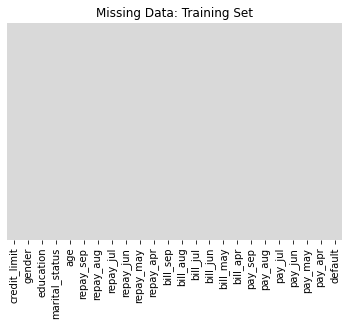

In [156]:
# Heatmap to double check missing data
sns.heatmap(taiwan.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

- Nothing missing

### Imputing and Binning Outlier Categories

- Education contains values of 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
    - The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)
    <br><br>
- Marital Status has a label 0 that is undocumented.
    - The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).
    
- Repayment status has labels of -2 and 0 which are undocumented. 
    - Add to -1 for now to indicate paid on time, as they would not be delinquent.
    
- Extreme outliers in credit limit. 
    - Bring down to above the 75th percentile of 240,000NT to next highest value rounded up to 350,000.

In [157]:
print(taiwan['education'].value_counts())
print(taiwan['marital_status'].value_counts())

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: education, dtype: int64
2    12026
1    10195
3      234
0       44
Name: marital_status, dtype: int64


In [158]:
taiwan.credit_limit.value_counts(ascending = True)

327680        1
690000        1
740000        1
1000000       1
800000        1
           ... 
200000     1134
80000      1210
30000      1223
20000      1488
50000      2534
Name: credit_limit, Length: 80, dtype: int64

In [159]:
taiwan['education'] = np.where((taiwan.education == 5) | (taiwan.education == 6) | (taiwan.education == 0), 4, taiwan.education)
taiwan['education'].value_counts()

2    10516
1     7919
3     3713
4      351
Name: education, dtype: int64

In [160]:
taiwan['marital_status'] = np.where((taiwan.marital_status == 0), 3, taiwan.marital_status)
taiwan['marital_status'].value_counts()

2    12026
1    10195
3      278
Name: marital_status, dtype: int64

In [161]:
taiwan['repay_sep'] = np.where((taiwan.repay_sep == -2) | (taiwan.repay_sep == 0), -1, taiwan.repay_sep)
taiwan['repay_aug'] = np.where((taiwan.repay_aug == -2) | (taiwan.repay_aug == 0), -1, taiwan.repay_aug)
taiwan['repay_jul'] = np.where((taiwan.repay_jul == -2) | (taiwan.repay_jul == 0), -1, taiwan.repay_jul)
taiwan['repay_jun'] = np.where((taiwan.repay_jun == -2) | (taiwan.repay_jun == 0), -1, taiwan.repay_jun)
taiwan['repay_may'] = np.where((taiwan.repay_may == -2) | (taiwan.repay_may == 0), -1, taiwan.repay_may)
taiwan['repay_apr'] = np.where((taiwan.repay_apr == -2) | (taiwan.repay_apr == 0), -1, taiwan.repay_apr)

In [162]:
taiwan['credit_limit'] = np.where((taiwan.credit_limit > 240_000), 350_000, taiwan.credit_limit)

### Looking at Bills & Payments

In [163]:
bills = ['bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']

In [164]:
payment = ['pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']

In [165]:
taiwan[bills].describe()

,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr
count,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000
mean,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356
std,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959
min,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000
25%,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000
50%,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000
75%,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [166]:
# impute mean for 0 values?

In [167]:
taiwan[payment].describe()

,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
count,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000
mean,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301
std,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000
50%,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000


## 2. EDA

In [168]:
taiwan.describe()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,164755.855816,1.603227,1.844260,1.559225,35.447931,-0.414507,-0.528423,-0.551269,-0.619183,-0.673274,...,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,119088.099950,0.489239,0.745099,0.520785,9.237634,1.143813,1.149787,1.131963,1.077311,1.012396,...,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,350000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


### Pairplot

#### Takeaways

- Average Age is 35.5.
- Average amount of credit limit is 167,055. Standard deviation is huge, with the highest limit being 1,000,000.
- Average education level is high, with most having university or graduate school education.
- The mean of the default column is .22, meaning according to this data about 22% will default on their credit loan next month.

In [169]:
# bills and payment amounts for last 3 months
check = ['default', 'credit_limit', 'bill_sep', 'bill_aug', 'bill_jul', 'pay_sep', 'pay_aug', 'pay_jul']

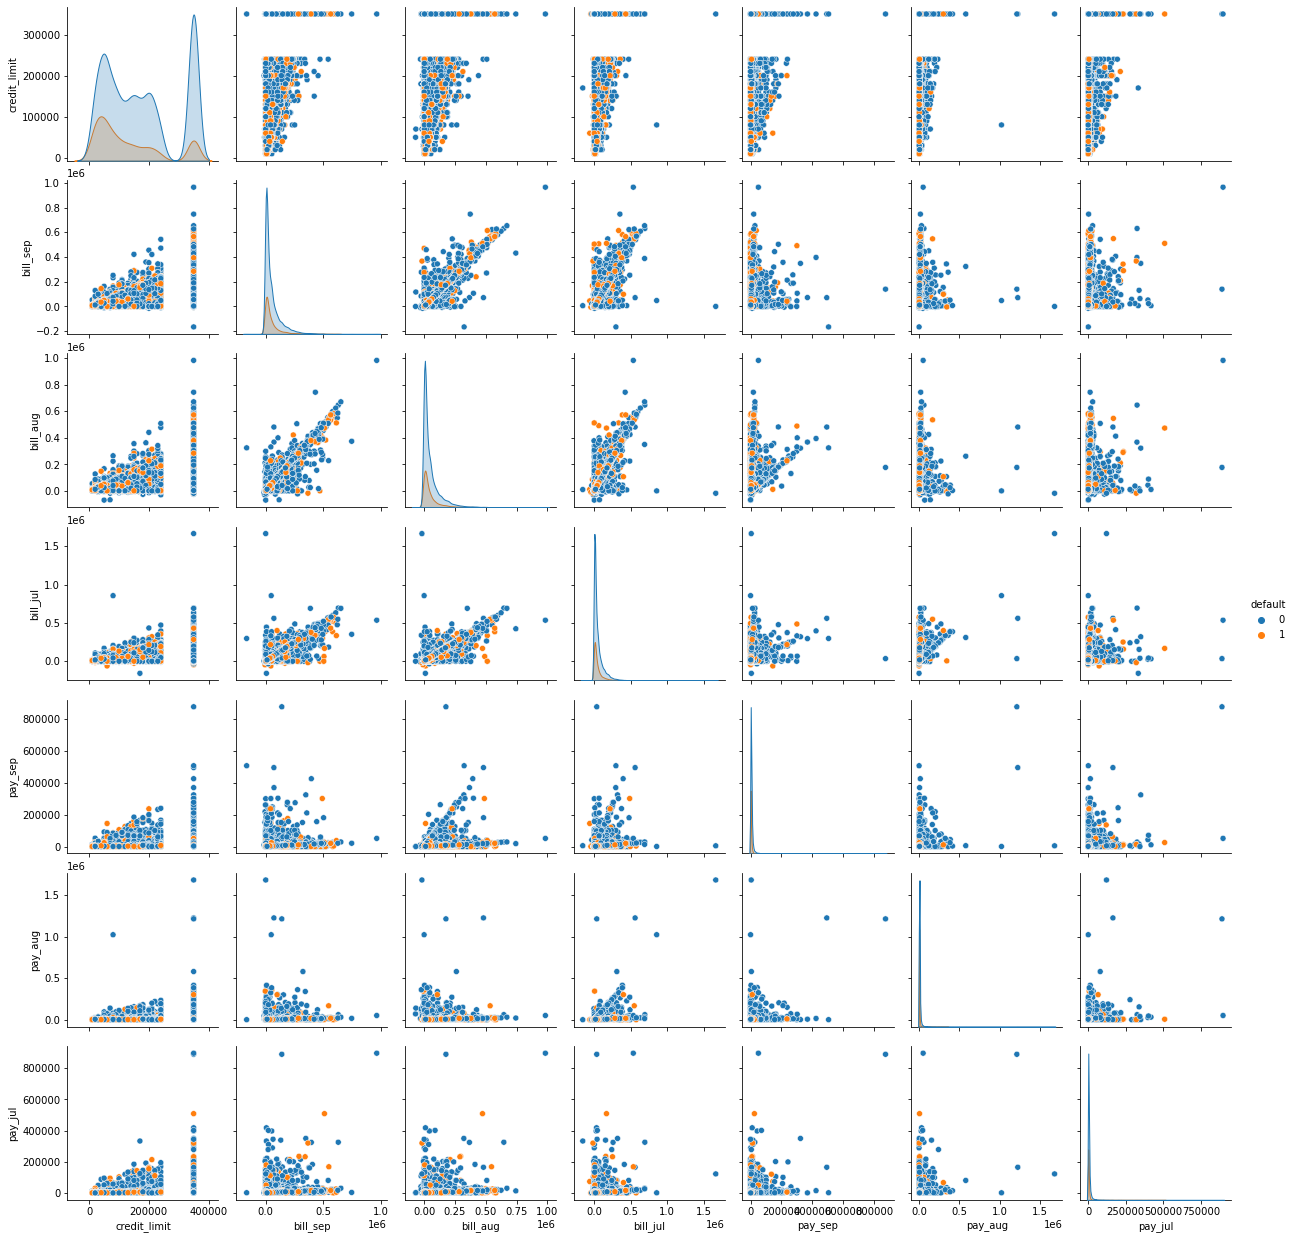

In [170]:
credit = taiwan[check]

sns.pairplot(credit, hue = 'default')
plt.show();

### Marital Status & Credit Limit

''

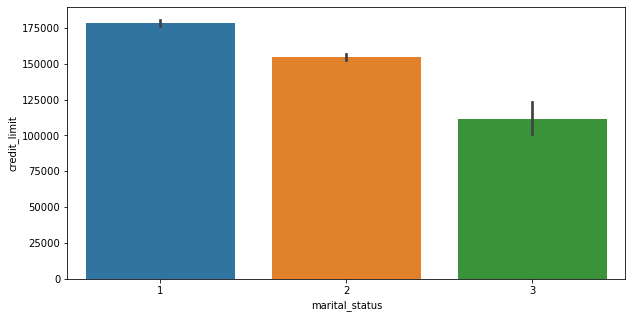

In [171]:
x_line = taiwan['marital_status']
y_line = taiwan['credit_limit']

plt.figure(figsize=(10, 5))
sns.barplot(data = taiwan, x = x_line, y = y_line)
;

### Age & Credit Limit

''

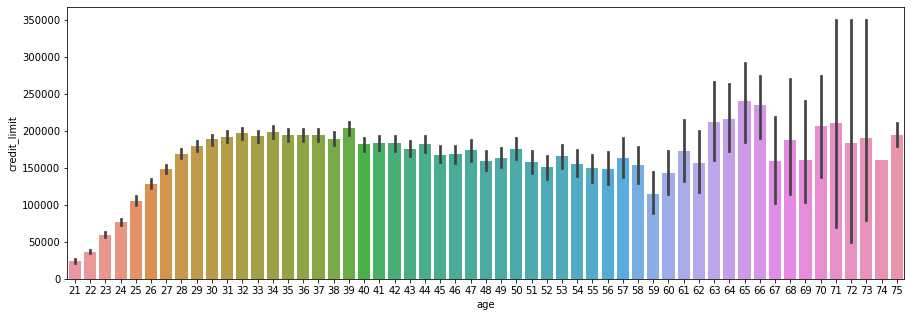

In [172]:
x_line = taiwan['age']
y_line = taiwan['credit_limit']

plt.figure(figsize=(15, 5))
sns.barplot(data = taiwan, x = x_line, y = y_line)
;

### Education Level & Last Month's Bill

''

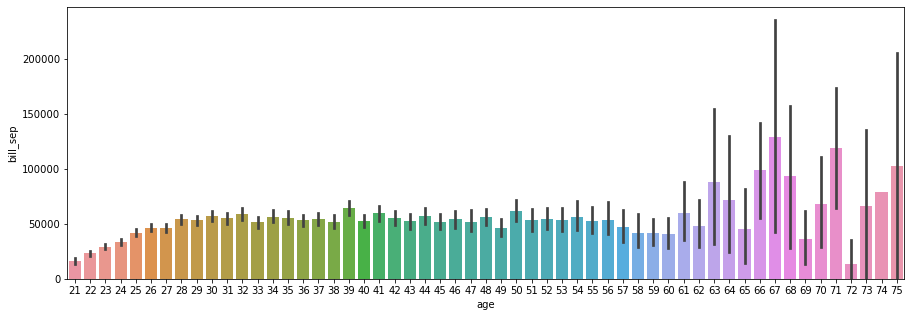

In [173]:
sx_line = taiwan['education']
y_line = taiwan['bill_sep']

plt.figure(figsize=(15, 5))
sns.barplot(data = taiwan, x = x_line, y = y_line)
;

### Marital Status vs Credit Limit

<AxesSubplot:xlabel='marital_status', ylabel='credit_limit'>

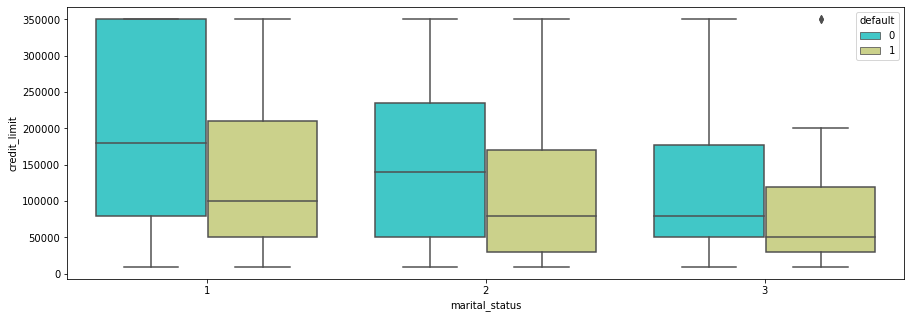

In [174]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'marital_status', hue = 'default', y = 'credit_limit', data = taiwan, palette = "rainbow")

### Default by Sex

<AxesSubplot:xlabel='gender', ylabel='count'>

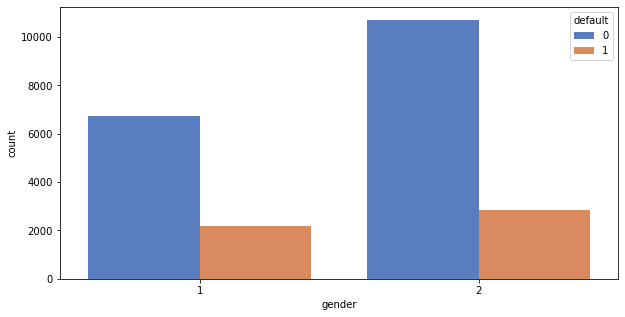

In [175]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'gender', data = taiwan, hue = 'default', palette = 'muted')

In [176]:
taiwan_corr = taiwan.corr()

In [177]:
taiwan_corr

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
credit_limit,1.000000,0.037435,-0.239810,-0.107745,0.140247,-0.174714,-0.207187,-0.200938,-0.189822,-0.181150,...,0.279459,0.280010,0.274847,0.182530,0.147398,0.180274,0.178265,0.188894,0.199639,-0.161677
gender,0.037435,1.000000,0.014108,-0.023167,-0.093937,-0.027348,-0.035181,-0.032921,-0.033939,-0.035745,...,-0.020942,-0.016267,-0.016368,0.004579,-0.000655,-0.006248,0.000075,0.000469,-0.001997,-0.037953
education,-0.239810,0.014108,1.000000,-0.138084,0.180827,0.052549,0.065964,0.054405,0.052681,0.037997,...,-0.009284,-0.015593,-0.016725,-0.041572,-0.032531,-0.044643,-0.047210,-0.046910,-0.046576,0.037384
marital_status,-0.107745,-0.023167,-0.138084,1.000000,-0.414435,-0.019674,-0.011385,0.002719,-0.004471,-0.002349,...,-0.026614,-0.027756,-0.023524,0.003434,-0.007012,-0.000405,-0.007626,-0.004171,-0.005272,-0.032121
age,0.140247,-0.093937,0.180827,-0.414435,1.000000,0.004621,-0.005187,-0.018513,-0.006150,-0.014766,...,0.052860,0.051109,0.048705,0.026827,0.019959,0.030200,0.018125,0.023779,0.019674,0.014586
repay_sep,-0.174714,-0.027348,0.052549,-0.019674,0.004621,1.000000,0.700821,0.502169,0.447156,0.418157,...,0.004175,0.013597,0.013580,-0.086429,-0.059035,-0.065887,-0.063955,-0.062613,-0.056986,0.394783
repay_aug,-0.207187,-0.035181,0.065964,-0.011385,-0.005187,0.700821,1.000000,0.658298,0.515417,0.468695,...,0.029514,0.038118,0.040353,-0.097918,-0.053280,-0.059547,-0.052861,-0.047950,-0.047989,0.331835
repay_jul,-0.200938,-0.032921,0.054405,0.002719,-0.018513,0.502169,0.658298,1.000000,0.672927,0.537160,...,0.013725,0.023274,0.025803,-0.043637,-0.071467,-0.058808,-0.053999,-0.053274,-0.050541,0.295951
repay_jun,-0.189822,-0.033939,0.052681,-0.004471,-0.006150,0.447156,0.515417,0.672927,1.000000,0.722543,...,0.019362,0.033153,0.038702,-0.055227,-0.036581,-0.074303,-0.054447,-0.052665,-0.048823,0.275654
repay_may,-0.181150,-0.035745,0.037997,-0.002349,-0.014766,0.418157,0.468695,0.537160,0.722543,1.000000,...,0.031219,0.045044,0.051119,-0.053363,-0.039012,-0.037855,-0.065883,-0.052304,-0.047316,0.269613


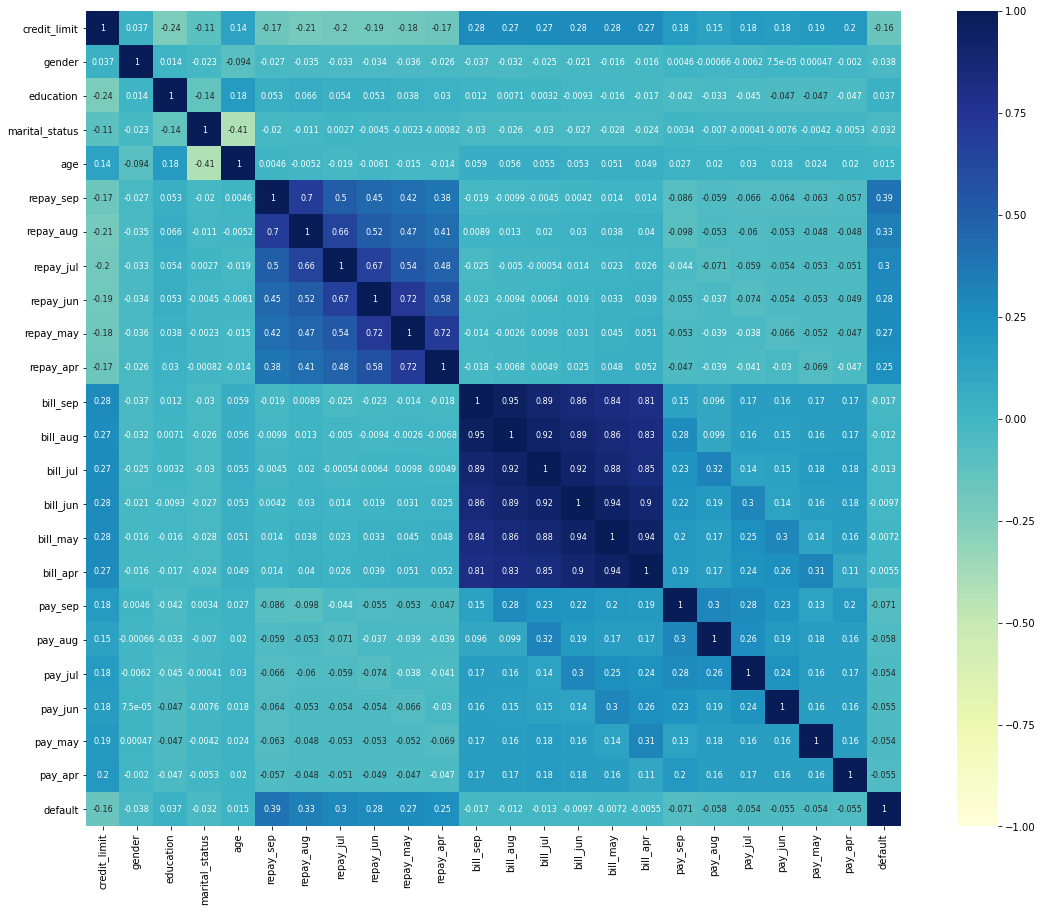

In [178]:
plt.subplots(figsize=(20,15))

corr = taiwan_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = taiwan_corr.columns.values, # x labels
    yticklabels = taiwan_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

<AxesSubplot:title={'center':'Correlation with Default'}>

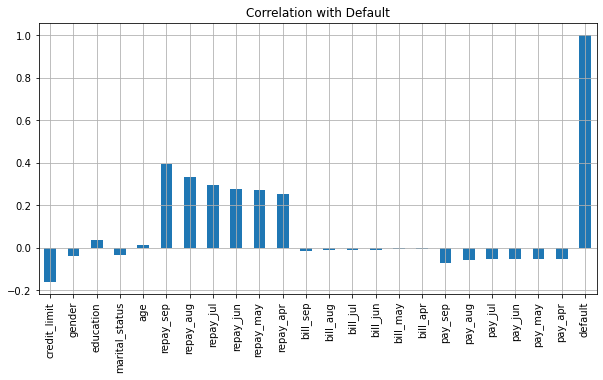

In [179]:
taiwan.corrwith(taiwan.default).plot.bar(figsize = (10, 5), title = "Correlation with Default", 
                                        fontsize = 10,rot = 90, grid = True)

**Takeaways:**
- Credit limit has the highest negative correlation with our target.
- Repayment status for last month (sep) has highest positive correlation.

## 3. Feature Engineering

In [180]:
taiwan.head()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,default
28835,220000,2,1,2,36,-1,-1,-1,-1,-1,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,-1,-1,-1,-1,-1,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,-1,-1,-1,-1,-1,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [181]:
taiwan['credit_limit'].describe()

count     22499.000000
mean     164755.855816
std      119088.099950
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      350000.000000
Name: credit_limit, dtype: float64

In [182]:
# Married individuals with advanced degrees
taiwan['married_degree'] = np.where((taiwan.marital_status == 1) & ((taiwan.education == 1) | (taiwan.education == 2)), 1, 0)

# Single individuals with advanced degrees
taiwan['single_degree'] = np.where((taiwan.marital_status >= 2) & ((taiwan.education == 1) | (taiwan.education == 2)), 1, 0)

# Married individuals with HS education
taiwan['single_hs'] = np.where((taiwan.marital_status == 1) & (taiwan.education == 3), 1, 0)

# Single individuals with HS education
taiwan['married_hs'] = np.where((taiwan.marital_status >= 2) & (taiwan.education == 3), 1, 0)

# Married Men with advanced degrees 
taiwan['married_men_adv'] = np.where((taiwan.marital_status == 1) & (taiwan.education <= 2) & (taiwan.gender == 1), 1, 0)

# Single Men with advanced degrees 
taiwan['single_men_adv'] = np.where((taiwan.marital_status >= 2) & (taiwan.education <= 2) & (taiwan.gender == 1), 1, 0)

# Married Women with advanced degrees
taiwan['married_women_adv'] = np.where((taiwan.marital_status == 1) & (taiwan.education <= 2) & (taiwan.gender == 2), 1, 0)

# Single Women with advanced degrees
taiwan['single_women_adv'] = np.where((taiwan.marital_status >= 2) & (taiwan.education <= 2) & (taiwan.gender == 2), 1, 0)

# Married Men without HS diploma
taiwan['married_men_dropout'] = np.where((taiwan.marital_status == 1) & (taiwan.education == 4) & (taiwan.gender == 1), 1, 0)

# Single Men without HS diploma
taiwan['single_men_dropout'] = np.where((taiwan.marital_status >= 2) & (taiwan.education == 4) & (taiwan.gender == 1), 1, 0)

# Married Women without HS diploma
taiwan['married_women_dropout'] = np.where((taiwan.marital_status == 1) & (taiwan.education == 4) & (taiwan.gender == 2), 1, 0)

# Single Women without HS diploma
taiwan['single_women_dropout'] = np.where((taiwan.marital_status >= 2) & (taiwan.education == 4) & (taiwan.gender == 2), 1, 0)

# All individuals with delinquent status over 3 months where last bill was over the mean of 50,000NT
taiwan['delinquent'] = np.where((taiwan.repay_sep == 3) & (taiwan.bill_sep >= 50_000), 1, 0)

# All individuals perfect payments
taiwan['no_risk'] = np.where((taiwan.repay_sep == -1) & (taiwan.repay_aug == -1) & (taiwan.repay_jul == -1) & (taiwan.repay_jun == -1) & (taiwan.repay_may == -1) & (taiwan.repay_apr == -1), 1, 0)



## 4. Feature Selection

### Split the Data for Analysis

In [183]:
# Split data to be used in the models
# Create matrix of features
X = taiwan.drop('default', axis = 1) # grabs everything else but 'default'


# Create target variable
y = taiwan['default'] # y is the column we're trying to predict

In [184]:
X.head()

,credit_limit,gender,education,marital_status,age,repay_sep,repay_aug,repay_jul,repay_jun,repay_may,...,married_men_adv,single_men_adv,married_women_adv,single_women_adv,married_men_dropout,single_men_dropout,married_women_dropout,single_women_dropout,delinquent,no_risk
28835,220000,2,1,2,36,-1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,0,0,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,1
18894,180000,2,1,2,27,-1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,0,0,1
690,80000,1,2,2,32,-1,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,1
6239,10000,1,2,2,27,-1,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,1


In [185]:
print(y.value_counts())
print("y dimensions:", len(y))
print("X dimensions:", len(X))

0    17471
1     5028
Name: default, dtype: int64
y dimensions: 22499
X dimensions: 22499


### One Hot Encode Categorical Variables

In [186]:
objects = ['gender', 'education', 'marital_status', 'repay_sep', 'repay_aug', 'repay_jul', 'repay_jun', 'repay_may', \
           'repay_apr', 'married_degree', 'single_degree', 'single_hs', 'married_hs', 'married_men_adv', 'single_men_adv', \
          'married_women_adv', 'single_women_adv', 'married_men_dropout', 'single_men_dropout', 'married_women_dropout', \
          'single_women_dropout', 'delinquent', 'no_risk']

X[objects] = X[objects].astype(str)

In [187]:
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(X.select_dtypes('object'))

OneHotEncoder(drop='first', sparse=False)

In [188]:
X = pd.DataFrame(ohe.transform(X.select_dtypes('object')),
                                  columns=ohe.get_feature_names(),
                                    index=X.index)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 6. Model Evaluation

## 7. Final Model